In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data_trainmodel.csv', sep=',', names=['TEXT', 'TOPIC'], header=None)
df

,TEXT,TOPIC
0,อาจารย์สอนก็ไม่ค่อยรู้เรื่อง,ด้านการเรียนการสอน
1,อาจารย์ดี,ด้านการเรียนการสอน
2,สอนก็เหมือนไม่สอน สอนไปก็ไม่เข้าใจอยู่ดี,ด้านการเรียนการสอน
3,โย่วสอนบ้างเถอเชื่อดิสั่งแต่งาน,ด้านการเรียนการสอน
4,สอนดี อาจารย์สอนสนุก,ด้านการเรียนการสอน
...,...,...
795,ปลอดภัย,สภาพแวดล้อมภายในและความปลอดภัย
796,ปลอดภัย อุ่นใจ,สภาพแวดล้อมภายในและความปลอดภัย
797,ร้านเทศามีหนอนเยอะ ขนลุก,สภาพแวดล้อมภายในและความปลอดภัย
798,ร้านเทศาอะเมื่อไหร่จะทำความสะอาดโต๊ะ,สภาพแวดล้อมภายในและความปลอดภัย


In [3]:
from io import StringIO

col=['TEXT','TOPIC']
df = df[col]
df = df[pd.notnull(df['TEXT'])]

df.columns = ['TEXT', 'TOPIC']

df['TOPIC_ID']=df['TOPIC'].factorize()[0]
topic_id_df = df[['TOPIC', 'TOPIC_ID']].drop_duplicates().sort_values('TOPIC_ID')
topic_to_id = dict(topic_id_df.values)
id_to_topic = dict(topic_id_df[['TOPIC_ID','TOPIC']].values)
df.tail()

,TEXT,TOPIC,TOPIC_ID
795,ปลอดภัย,สภาพแวดล้อมภายในและความปลอดภัย,3
796,ปลอดภัย อุ่นใจ,สภาพแวดล้อมภายในและความปลอดภัย,3
797,ร้านเทศามีหนอนเยอะ ขนลุก,สภาพแวดล้อมภายในและความปลอดภัย,3
798,ร้านเทศาอะเมื่อไหร่จะทำความสะอาดโต๊ะ,สภาพแวดล้อมภายในและความปลอดภัย,3
799,เทศานี่หนอนเยอะจัง,สภาพแวดล้อมภายในและความปลอดภัย,3


In [4]:
df['TOPIC_ID'].value_counts()

0    200
1    200
2    200
3    200
Name: TOPIC_ID, dtype: int64

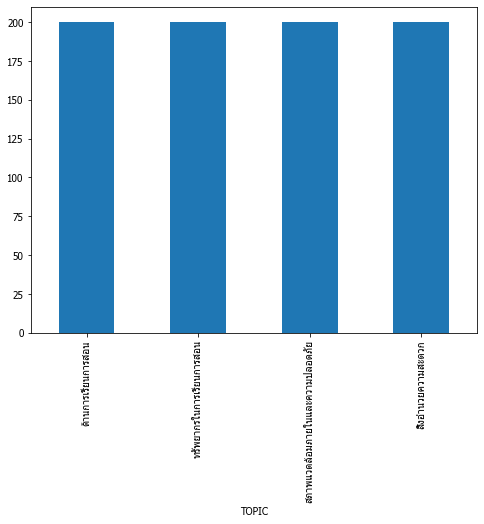

In [5]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = "Tahoma"
fig = plt.figure(figsize=(8,6))
ax = df.groupby('TOPIC').TEXT.count().plot.bar(ylim=0)
plt.show()

In [6]:
from pythainlp.corpus.common import thai_stopwords

thai_stopwords = list(thai_stopwords())
thai_stopwords.append('อ่ะ')
thai_stopwords.append('อะ')
thai_stopwords

['ส่วนด้อย',
 'จะ',
 'แต่จะ',
 'พอเพียง',
 'พวกมัน',
 'เกือบๆ',
 'พอตัว',
 'รวด',
 'อันละ',
 'อาจเป็น',
 'ช่วย',
 'ยาวนาน',
 'ถูก',
 'ฉะนั้น',
 'สมัยนั้น',
 'คุณ',
 'เมื่อนั้น',
 'จวบกับ',
 'ออก',
 'หรือ',
 'จนถึง',
 'ตรง',
 'บอกแล้ว',
 'ทีไร',
 'ทั้งหมด',
 'ตลอดกาลนาน',
 'เฉกเช่น',
 'บางกว่า',
 'แห่งนี้',
 'ใหญ่',
 'เมื่อคราว',
 'ทุกอัน',
 'เข้า',
 'ทุกหน',
 'แก่',
 'จัด',
 'นำพา',
 'ลง',
 'ทั้งมวล',
 'ครบครัน',
 'นะ',
 'ยาว',
 'เอ็ง',
 'เป็นแต่',
 'ช่วงนี้',
 'ดั่งเก่า',
 'ด้วยเหตุที่',
 'ช่วงแรก',
 'แต่ก่อน',
 'เป็นอันมาก',
 'ทีๆ',
 'ให้ไป',
 'เป็นเพราะ',
 'ปฏิบัติ',
 'สูงสุด',
 'แยะ',
 'พวกมึง',
 'ตลอดเวลา',
 'ที่นั้น',
 'ระยะ',
 'อื่น',
 'อย่างละ',
 'นัก',
 'กับ',
 'กลุ่มก้อน',
 'จนตลอด',
 'แห่งนั้น',
 'เมื่อก่อน',
 'น่ะ',
 'นู้น',
 'เช่นเดียวกัน',
 'เช่นที่เคย',
 'ระหว่าง',
 'ใคร่จะ',
 'เหตุนี้',
 'ซึ่งก็คือ',
 'มั๊ย',
 'อยาก',
 'มั้ย',
 'ทำๆ',
 'พวกนั้น',
 'ทุกวันนี้',
 'เต็มไปหมด',
 'ครับ',
 'บางขณะ',
 'ทุกสิ่ง',
 'ยืนยัน',
 'ครบถ้วน',
 'คราวโน้น',
 'ส่วนน้อย',
 'ประสบ',
 'ยืนน

In [7]:
from pythainlp import word_tokenize

In [8]:
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ", "#", ",", "-", "/", "=", "(", ")" ,"+","|"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() if word not in ('อะ','อ่ะ'))
    final = " ".join(word for word in final.split() if word.lower not in thai_stopwords)
    return final

In [9]:
df['TEXT TOKENS'] = df['TEXT'].apply(text_process)
df

,TEXT,TOPIC,TOPIC_ID,TEXT TOKENS
0,อาจารย์สอนก็ไม่ค่อยรู้เรื่อง,ด้านการเรียนการสอน,0,อาจารย์ สอน ก็ ไม่ค่อย รู้เรื่อง
1,อาจารย์ดี,ด้านการเรียนการสอน,0,อาจารย์ ดี
2,สอนก็เหมือนไม่สอน สอนไปก็ไม่เข้าใจอยู่ดี,ด้านการเรียนการสอน,0,สอน ก็ เหมือน ไม่ สอน สอน ไป ก็ ไม่ เข้าใจ อยู่ดี
3,โย่วสอนบ้างเถอเชื่อดิสั่งแต่งาน,ด้านการเรียนการสอน,0,โย่ว สอน บ้าง เถอ เชื่อ ดิ สั่ง แต่ งาน
4,สอนดี อาจารย์สอนสนุก,ด้านการเรียนการสอน,0,สอน ดี อาจารย์ สอน สนุก
...,...,...,...,...
795,ปลอดภัย,สภาพแวดล้อมภายในและความปลอดภัย,3,ปลอดภัย
796,ปลอดภัย อุ่นใจ,สภาพแวดล้อมภายในและความปลอดภัย,3,ปลอดภัย อุ่นใจ
797,ร้านเทศามีหนอนเยอะ ขนลุก,สภาพแวดล้อมภายในและความปลอดภัย,3,ร้าน เท ศา มี หนอน เยอะ ขนลุก
798,ร้านเทศาอะเมื่อไหร่จะทำความสะอาดโต๊ะ,สภาพแวดล้อมภายในและความปลอดภัย,3,ร้าน เท ศา เมื่อไหร่ จะ ทำความสะอาด โต๊ะ


In [10]:
from wordcloud import WordCloud, STOPWORDS

<function matplotlib.pyplot.show(close=None, block=None)>

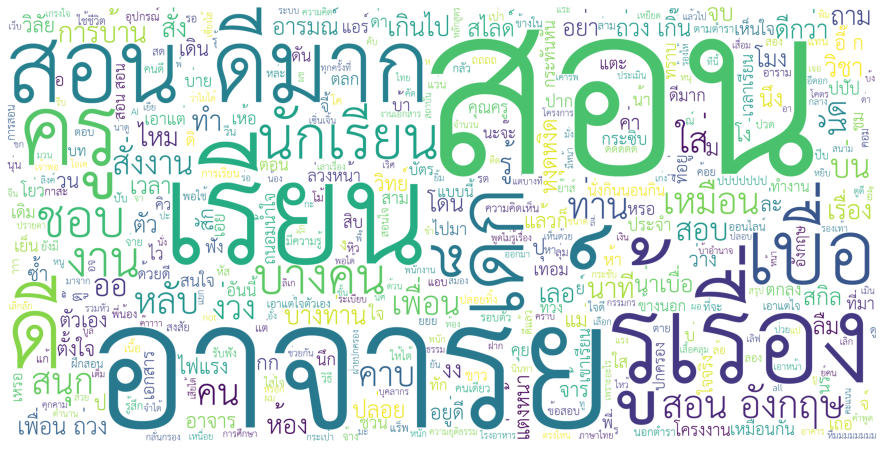

In [11]:
# ด้านการเรียนการสอน
df_learning = df[df['TOPIC_ID']==0]
learning_word_all = " ".join(text for text in df_learning['TEXT TOKENS'])
reg = r"[ก-๙a-zA-Z]+"
fp = 'THSarabunNew.ttf'

wordcloud = WordCloud(stopwords=thai_stopwords, background_color='white', max_words=2000, height=2000, width=4000, 
                       font_path=fp, regexp=reg).generate(learning_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

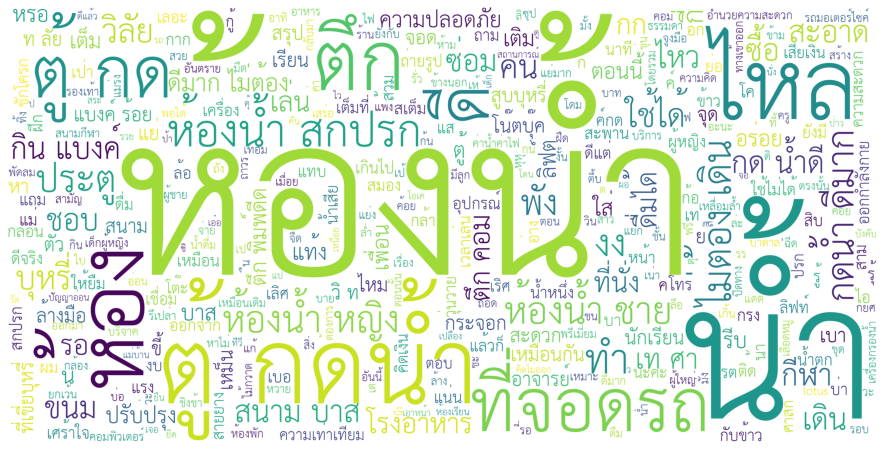

In [12]:
# สิ่งอำนวยความสะดวก
df_facilities = df[df['TOPIC_ID']==1]
facilities_word_all = " ".join(text for text in df_facilities['TEXT TOKENS'])

wordcloud = WordCloud(stopwords=thai_stopwords, background_color='white', max_words=2000, height=2000, width=4000, 
                       font_path=fp, regexp=reg).generate(facilities_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

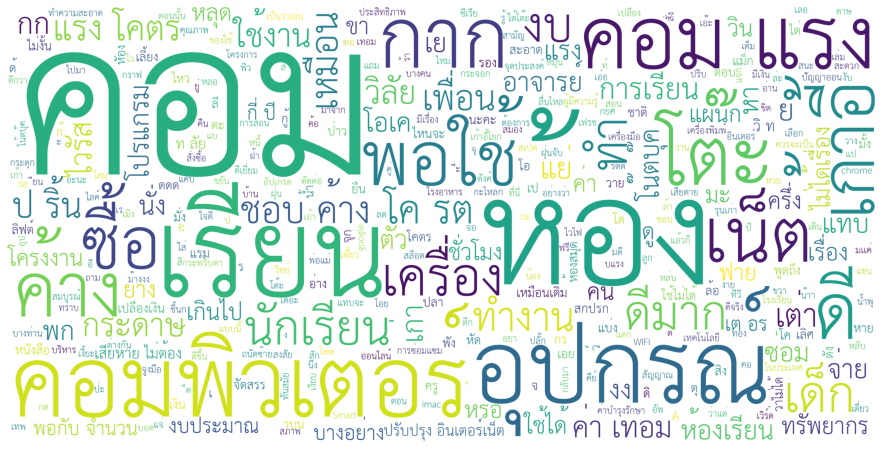

In [13]:
# ทรัพยากรในการเรียนการสอน
df_resource = df[df['TOPIC_ID']==2]
resource_word_all = " ".join(text for text in df_resource['TEXT TOKENS'])

wordcloud = WordCloud(stopwords=thai_stopwords, background_color='white', max_words=2000, height=2000, width=4000, 
                       font_path=fp, regexp=reg).generate(resource_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

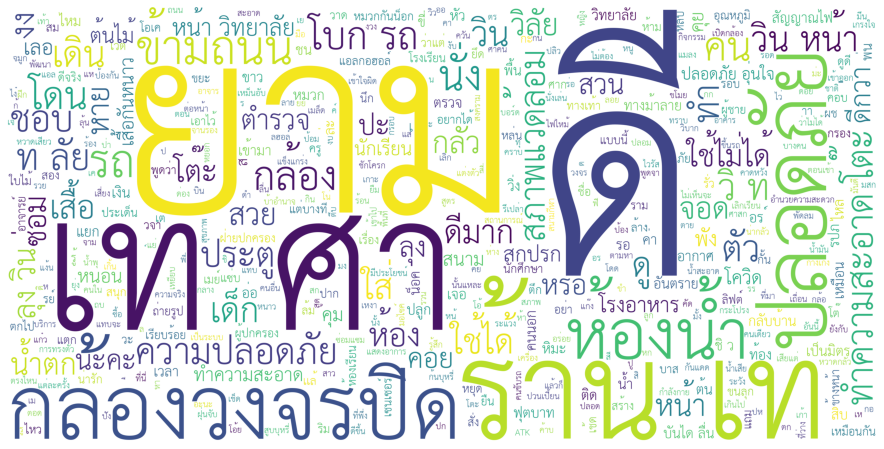

In [14]:
# สภาพแวดล้อมและความปลอดภัย
df_safety = df[df['TOPIC_ID']==3]
safety_word_all = " ".join(text for text in df_safety['TEXT TOKENS'])

wordcloud = WordCloud(stopwords=thai_stopwords, background_color='white', max_words=2000, height=2000, width=4000, 
                       font_path=fp, regexp=reg).generate(safety_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [119]:
X = df[['TEXT TOKENS']]
y = df['TOPIC_ID']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [121]:
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['TEXT TOKENS'])
cvec.vocabulary_

{'ครู': 130,
 'สอน': 722,
 'ไม่': 1155,
 'รู้เรื่อง': 635,
 'สั่ง': 731,
 'การบ้าน': 68,
 'เยอะ': 964,
 'วีน': 686,
 'ใส่': 1140,
 'เด็ก': 910,
 'เรียน': 971,
 'ดี': 251,
 'เลย': 976,
 'ดีแล้ว': 259,
 'ที่': 354,
 'ยัง': 584,
 'ตาย': 300,
 'ยยย': 581,
 'เก้าอี้': 877,
 'ดีมาก': 256,
 'หลับ': 782,
 'สบาย': 709,
 'ห้องสมุด': 805,
 'มี': 565,
 'ไว้': 1166,
 'ทำไม': 349,
 'ก่อน': 83,
 'แล้วแต่': 1086,
 'วิชา': 678,
 'และ': 1083,
 'อาจารย์': 840,
 'ส่วนมาก': 753,
 'ก็': 80,
 'คง': 117,
 'เบื่อ': 931,
 'อยาก': 812,
 'ถาม': 322,
 'ตัวเอง': 295,
 'เหมือนกัน': 1014,
 'ว่า': 689,
 'ไป': 1152,
 'ตอน': 285,
 'พวก': 521,
 'กู': 78,
 'จ่าย': 214,
 'ค่า': 168,
 'เทอม': 922,
 'เร็ว': 975,
 'อย่าง': 817,
 'เดอะ': 904,
 'เ': 866,
 'เฟรช': 954,
 'พอ': 522,
 'จะ': 196,
 'ตัง': 291,
 'คืน': 157,
 'ช้า': 235,
 'กลับ': 46,
 'สล็อต': 718,
 'วาย': 676,
 'ฟาย': 547,
 'ชอบ': 223,
 'แตะ': 1050,
 'เนื้อ': 927,
 'ต้อง': 315,
 'ตัว': 294,
 'คน': 119,
 'แต่': 1051,
 'บ่น': 453,
 'ยาม': 591,
 'ช่วย': 233,
 'ตลอด': 282

In [122]:
train_bow = cvec.transform(X_train['TEXT TOKENS'])

In [123]:
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names(), index=X_train['TEXT TOKENS'])

,1,10,100,132,16,2,2000,23,3,4,...,ไหม,ไหล,ไหว,ไหว้,ไอ,็ต,่,์,​,​ลง​
TEXT TOKENS,,,,,,,,,,,,,,,,,,,,,
ครู สอน ไม่ รู้เรื่อง สั่ง การบ้าน เยอะ วีน ใส่ เด็ก,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
เรียน ดี เลย ดีแล้ว ที่ ยัง ไม่ ตาย ยยย,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
เก้าอี้ ดีมาก หลับ สบาย,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ห้องสมุด มี ไว้ ทำไม ก่อน,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
แล้วแต่ วิชา และ อาจารย์ ส่วนมาก ก็ คง เบื่อ อยาก ถาม ตัวเอง เหมือนกัน ว่า เรียน ไป ทำไม,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
สกิล สอน ให้ ห้า สกิล ปาก ให้ สิบ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
เหมือน อุปกรณ์ ไม่ พอใช้,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
แรม มี 4 ใช้ ไป 16 ค้าง,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [124]:
from sklearn.metrics import confusion_matrix,classification_report
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
scores=[]
conf_mats=[]
conf_mat_ps=[]
for model in models:
    model_name = model.__class__
    clf = model_name()
    clf.fit(train_bow, y_train)
    test_bow = cvec.transform(X_test['TEXT TOKENS'])
    test_predictions = clf.predict(test_bow)
    conf_mat = confusion_matrix(y_test, test_predictions)
    conf_mats.append(conf_mat)    
    conf_mat_ps.append(conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis])
    scores.append(clf.score(test_bow, y_test))
    print(model_name.__name__)
    print("="*80)
    print(classification_report(test_predictions, y_test))
    
scores

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        55
           1       0.77      0.85      0.81        47
           2       0.77      0.85      0.80        39
           3       0.89      0.81      0.85        59

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200

LinearSVC
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        53
           1       0.77      0.77      0.77        52
           2       0.77      0.77      0.77        43
           3       0.76      0.79      0.77        52

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

MultinomialNB
              precision    recall  f1-score   support

           0       0.98     

[0.85, 0.81, 0.825, 0.835]

In [125]:
scores = np.array(scores)
index_max = np.argmax(scores)
index_max

0

In [126]:
print(models[index_max].__class__.__name__)
print(conf_mats[index_max])
print(conf_mat_ps[index_max])

best_model = models[index_max].__class__
best_score = scores[index_max]
best_model_name = best_model.__name__
best_conf_mat_p = conf_mat_ps[index_max]

RandomForestClassifier
[[49  0  2  0]
 [ 2 40  4  6]
 [ 3  2 33  5]
 [ 1  5  0 48]]
[[0.96078431 0.         0.03921569 0.        ]
 [0.03846154 0.76923077 0.07692308 0.11538462]
 [0.06976744 0.04651163 0.76744186 0.11627907]
 [0.01851852 0.09259259 0.         0.88888889]]


                              TOPIC  TOPIC_ID
0                ด้านการเรียนการสอน         0
200              สิ่งอำนวยความสะดวก         1
400        ทรัพยากรในการเรียนการสอน         2
600  สภาพแวดล้อมภายในและความปลอดภัย         3


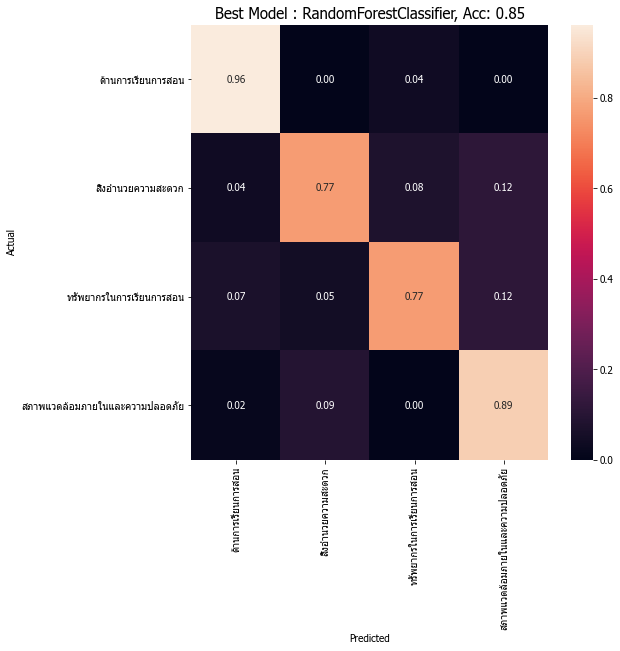

In [127]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(best_conf_mat_p, annot=True, fmt='.2f',
            xticklabels=topic_id_df.TOPIC.values, yticklabels=topic_id_df.TOPIC.values)
print(topic_id_df)
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Best Model : {0}, Acc: {1}'.format(best_model_name, best_score)
plt.title(all_sample_title, size = 15);
plt.show()

## รันโมเดลที่แม่นยำที่สุดอีกครั้ง

In [128]:
clf = best_model()
clf.fit(train_bow, y_train)

RandomForestClassifier()

In [129]:
def predict_text(my_texts):
    my_tokens = [text_process(t) for t in my_texts]
    my_bow = cvec.transform(pd.Series(my_tokens))
    my_predictions = clf.predict(my_bow)
    return my_predictions

In [130]:
my_texts = [
    'สั่งแต่งานอย่างเดียวสอนก็ไม่รู้เรื่อง วิชาที่เรียนห้อง 132',
    'ห้องน้ำตึก 1 นี่ไม่ไหวเลย เดินผ่านแทบสลบ',
    'ยามหน้าประตู 1 ไม่ดูแลเลย ปล่อยให้เด็กอื่นเข้ามา',
    'คอมพิวเตอร์เก่ามาก แถมเครื่องก็น้อยไม่พอเรียน'
]

my_predictions = predict_text(my_texts)

In [131]:
# my_bow = cvec.transform(pd.Series(my_tokens))
# my_predictions = clf.predict(my_bow)


In [132]:
topics = [id_to_topic[m] for m in my_predictions]
pd_predict_result = pd.DataFrame(list(zip(my_texts, my_predictions, topics)), columns=['Token','Pred_Topic_ID', 'Pred_Topic_Name'])
pd_predict_result

,Token,Pred_Topic_ID,Pred_Topic_Name
0,สั่งแต่งานอย่างเดียวสอนก็ไม่รู้เรื่อง วิชาที่เ...,0,ด้านการเรียนการสอน
1,ห้องน้ำตึก 1 นี่ไม่ไหวเลย เดินผ่านแทบสลบ,1,สิ่งอำนวยความสะดวก
2,ยามหน้าประตู 1 ไม่ดูแลเลย ปล่อยให้เด็กอื่นเข้ามา,3,สภาพแวดล้อมภายในและความปลอดภัย
3,คอมพิวเตอร์เก่ามาก แถมเครื่องก็น้อยไม่พอเรียน,2,ทรัพยากรในการเรียนการสอน


In [137]:
text = input("กรอกความคิดเห็น")
my_p = predict_text([text])
my_p
topics = [id_to_topic[m] for m in my_p]
pd_predict_result = pd.DataFrame(list(zip([text], my_p, topics)), columns=['Token','Pred_Topic_ID', 'Pred_Topic_Name'])
pd_predict_result

กรอกความคิดเห็นสอนเก่งไปอ่ะเป่า


,Token,Pred_Topic_ID,Pred_Topic_Name
0,สอนเก่งไปอ่ะเป่า,0,ด้านการเรียนการสอน
